# Setup and Basic Operations
Change the current directory, print a basic message, and check the Python version using shell commands.

In [1]:
# Change directory (adjust path as needed)
%cd ~/src/laboratori/0102

# Print a message
print('Hello World!')

# Check Python version
!python --version

/home/jovyan/src/laboratori/0102
Hello World!
Python 3.11.6


# Generating Random Integers (Dice Rolls)
Import the `random` library and use `random.randint(1, 6)` to simulate single and multiple dice rolls.

In [2]:
import random

# Single dice roll
roll1 = random.randint(1, 6)
print(f"Single roll: {roll1}")

# Multiple dice rolls (only last value shown by default)
random.randint(1, 6)
random.randint(1, 6)
last_roll = random.randint(1, 6)
print(f"Last roll of three: {last_roll}")

# Multiple dice rolls printed explicitly
print("Three separate rolls:")
print(random.randint(1, 6))
print(random.randint(1, 6))
print(random.randint(1, 6))

Single roll: 5
Last roll of three: 5
Three separate rolls:
2
3
4


# Seeding the Random Number Generator
Demonstrate seeding the random number generator using `random.seed()` (system time) and a fixed integer for reproducible results.

In [3]:
import random

# Seed with system time (less predictable)
print("Seeding with system time:")
random.seed()
print(random.randint(1, 6))
print(random.randint(1, 6))
print(random.randint(1, 6))

# Seed with a fixed integer (reproducible)
print("\nSeeding with 114 (first run):")
random.seed(114)
print(random.randint(1, 6))
print(random.randint(1, 6))
print(random.randint(1, 6))

print("\nSeeding with 114 (second run):")
random.seed(114)
print(random.randint(1, 6))
print(random.randint(1, 6))
print(random.randint(1, 6))

Seeding with system time:
4
5
5

Seeding with 114 (first run):
2
5
1

Seeding with 114 (second run):
2
5
1


# Generating Lists of Random Integers
Create lists of random integers using `for` loops with `append` and list concatenation, and using list comprehension.

In [4]:
import random

# Using a for loop and append
dices_append = []
for i in range(10):
    dices_append.append(random.randint(1, 6))
print(f"Using append: {dices_append}")

# Using a for loop and list concatenation
dices_concat = []
for _ in range(10): # _ indicates the loop variable isn't used
    dices_concat += [random.randint(1, 6)]
print(f"Using concat: {dices_concat}")

# Using list comprehension (preferred)
dices_comp = [random.randint(1, 6) for _ in range(10)]
print(f"Using list comprehension: {dices_comp}")

Using append: [3, 6, 2, 6, 5, 1, 2, 5, 5, 6]
Using concat: [5, 3, 5, 1, 5, 3, 3, 6, 1, 1]
Using list comprehension: [4, 4, 1, 5, 5, 3, 3, 5, 6, 6]


# Analyzing Dice Roll Frequencies
Slice a list of dice rolls, count the occurrences of a specific value using `count()`, and calculate the frequency of each possible outcome (1-6).

In [5]:
import random

# Generate a larger sample
random.seed(114) # for consistency
dices = [random.randint(1, 6) for _ in range(600)]

# Slice the list
print(f"First 15 rolls: {dices[:15]}")

# Count occurrences of '1'
count_1 = dices.count(1)
print(f"Count of 1s: {count_1}")

# Possible outcomes
possible_outcomes = list(range(1, 7))
print(f"Possible outcomes: {possible_outcomes}")

# Calculate frequencies for each outcome
freqs = [dices.count(i) for i in possible_outcomes]
print(f"Frequencies (1-6): {freqs}")

First 15 rolls: [2, 5, 1, 3, 6, 2, 6, 5, 1, 2, 5, 5, 6, 5, 3]
Count of 1s: 109
Possible outcomes: [1, 2, 3, 4, 5, 6]
Frequencies (1-6): [109, 89, 106, 110, 93, 93]


# Loading Excel Data with Pandas
Import pandas, numpy, and matplotlib. Read data from an Excel file (`body.xlsx`) into a dictionary of DataFrames and then into a single DataFrame, specifying the index column.

*Note: This assumes `body.xlsx` is in the current working directory or a specified path.*

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the Excel file
# Adjust this path if the file is located elsewhere
path = 'body.xlsx'

try:
    # Read all sheets into a dictionary of DataFrames
    all_sheets = pd.read_excel(path, sheet_name=None)
    print(f"Sheets found: {list(all_sheets.keys())}")

    # Read the first sheet (or specify sheet name) into a DataFrame
    # Assuming the first column is the index
    body_df = pd.read_excel(path, index_col=0)
    print("\nDataFrame loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {path}")
    print("Please ensure 'body.xlsx' is in the correct directory.")
    body_df = None # Set to None if loading fails
    all_sheets = None

Sheets found: ['body.dat', 'Sheet3', 'Sheet4', 'Sheet4 (2)', 'Sheet6', 'Sheet1', 'Sheet2']

DataFrame loaded successfully.


# Exploring DataFrame Structure
Display the loaded data, check its type (dictionary/DataFrame), view keys/sheet names, examine DataFrame columns, and check the type of a specific column (Series).

In [7]:
if all_sheets is not None:
    print(f"Type of object returned by read_excel(sheet_name=None): {type(all_sheets)}")
    print(f"Keys (sheet names): {list(all_sheets.keys())}")
    first_sheet_name = list(all_sheets.keys())[0]
    print(f"Type of the first sheet ('{first_sheet_name}'): {type(all_sheets[first_sheet_name])}")
    print(f"\nContent of the first sheet ('{first_sheet_name}'):")
    print(all_sheets[first_sheet_name].head()) # Display first few rows

if body_df is not None:
    print(f"\nType of object returned by read_excel(index_col=0): {type(body_df)}")
    print("\nDataFrame head:")
    print(body_df.head())
    print("\nDataFrame columns:")
    print(body_df.columns)
    # Check type of a specific column
    if 'Age (years)' in body_df.columns:
        age_series = body_df['Age (years)']
        print(f"\nType of the 'Age (years)' column: {type(age_series)}")
    else:
        print("\n'Age (years)' column not found.")
else:
    print("\nDataFrame 'body_df' was not loaded.")

Type of object returned by read_excel(sheet_name=None): <class 'dict'>
Keys (sheet names): ['body.dat', 'Sheet3', 'Sheet4', 'Sheet4 (2)', 'Sheet6', 'Sheet1', 'Sheet2']
Type of the first sheet ('body.dat'): <class 'pandas.core.frame.DataFrame'>

Content of the first sheet ('body.dat'):
   Id  Biacromial diameter (see Fig. 2)  \
0   1                              42.9   
1   2                              43.7   
2   3                              40.1   
3   4                              44.3   
4   5                              42.5   

   Biiliac diameter, or "pelvic breadth" (see Fig. 2)  \
0                                               26.0    
1                                               28.5    
2                                               28.2    
3                                               29.9    
4                                               29.9    

   Bitrochanteric diameter (see Fig. 2)  \
0                                  31.5   
1                         

# Accessing and Converting DataFrame Columns (Age)
Extract the 'Age (years)' column into a pandas Series, convert it to a Python list, and display slices of the data.

In [8]:
if body_df is not None and 'Age (years)' in body_df.columns:
    # Extract the column as a Series
    age_series = body_df['Age (years)']
    print(f"Original Series (first 15): \n{age_series.head(15)}")

    # Convert the Series to a Python list
    age_list = list(age_series)
    print(f"\nConverted List (first 15): {age_list[:15]}")
    print(f"Type after conversion: {type(age_list)}")
else:
    print("DataFrame 'body_df' or 'Age (years)' column not available.")
    age_list = [] # Initialize empty list if data is not available

Original Series (first 15): 
Id
1     21
2     23
3     28
4     23
5     22
6     21
7     26
8     27
9     23
10    21
11    23
12    22
13    20
14    26
15    23
Name: Age (years), dtype: int64

Converted List (first 15): [21, 23, 28, 23, 22, 21, 26, 27, 23, 21, 23, 22, 20, 26, 23]
Type after conversion: <class 'list'>


# Calculating and Plotting Age Frequencies
Find the min/max age, calculate the frequency of each age using `count()` and list comprehension, and plot the frequencies using `plt.plot()` and `plt.bar()`.

Min age: 18, Max age: 67

Age Frequencies: [4, 22, 34, 25, 28, 39, 28, 34, 23, 21, 17, 22, 15, 8, 20, 13, 15, 10, 9, 16, 7, 5, 11, 9, 7, 8, 10, 10, 6, 1, 4, 3, 1, 3, 4, 2, 1, 3, 2, 0, 0, 0, 1, 0, 3, 0, 1, 1, 0, 1]


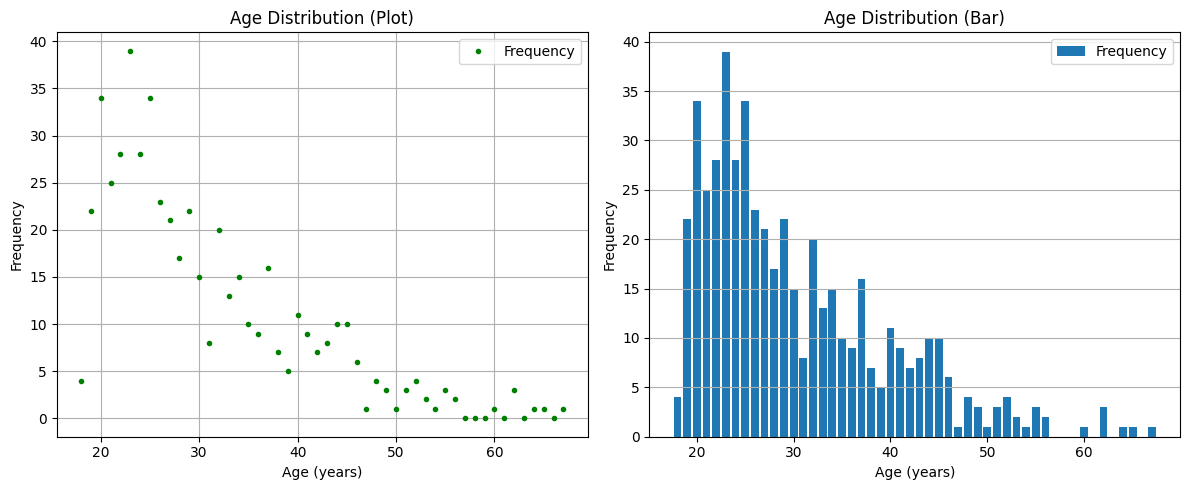

In [9]:
if age_list: # Check if age_list is not empty
    # Find min and max age
    min_age = min(age_list)
    max_age = max(age_list)
    print(f"Min age: {min_age}, Max age: {max_age}")

    # Calculate frequencies
    age_range = range(min_age, max_age + 1)
    age_freqs = [age_list.count(i) for i in age_range]
    print(f"\nAge Frequencies: {age_freqs}")

    # Create plots
    plt.figure(figsize=(12, 5))

    # Plot frequencies as dots
    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    plt.plot(age_range, age_freqs, 'g.', label='Frequency')
    plt.xlabel("Age (years)")
    plt.ylabel("Frequency")
    plt.title("Age Distribution (Plot)")
    plt.grid(True)
    plt.legend()

    # Plot frequencies as bars
    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    plt.bar(age_range, age_freqs, label='Frequency')
    plt.xlabel("Age (years)")
    plt.ylabel("Frequency")
    plt.title("Age Distribution (Bar)")
    plt.grid(axis='y')
    plt.legend()

    plt.tight_layout() # Adjust layout to prevent overlap
    # plt.savefig('images/age_distribution.png') # Optional: Save the figure
    plt.show()
else:
    print("Age data not available for frequency calculation and plotting.")

# Creating Histograms for Age Data
Generate histograms of the age data using `plt.hist()` with default bins and with explicitly defined bin edges. Be mindful that default binning might not be ideal for integer data.

Note: Default histogram bins might split integer counts.

Explicit bin edges: [18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69]


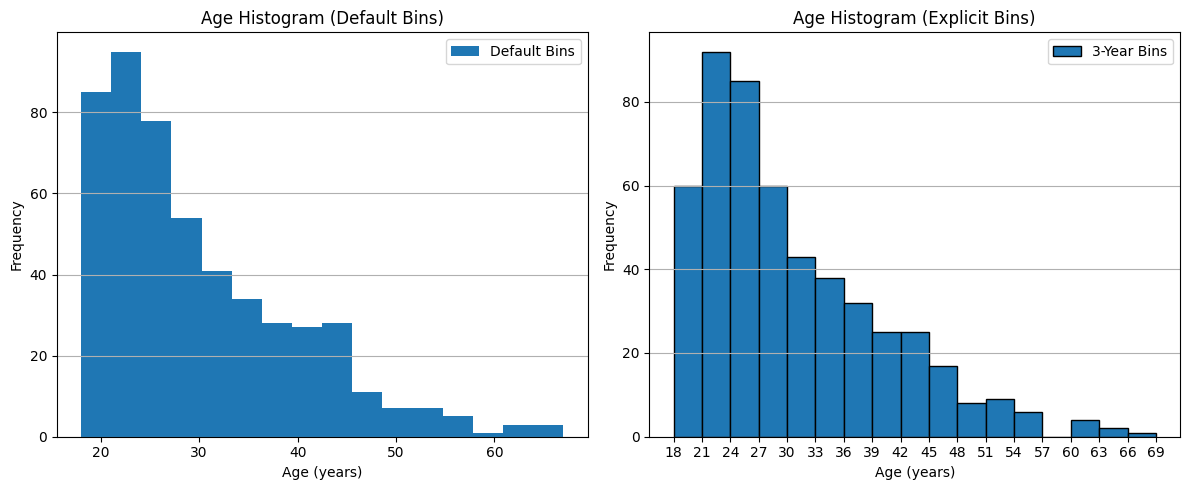

In [10]:
if age_list:
    plt.figure(figsize=(12, 5))

    # Histogram with default bins (may not align well with integers)
    plt.subplot(1, 2, 1)
    plt.hist(age_list, bins='auto', label='Default Bins') # 'auto' tries to find good binning
    plt.xlabel("Age (years)")
    plt.ylabel("Frequency")
    plt.title("Age Histogram (Default Bins)")
    plt.grid(axis='y')
    plt.legend()
    print("Note: Default histogram bins might split integer counts.")

    # Define explicit bin edges (e.g., every 3 years)
    min_age = min(age_list)
    max_age = max(age_list)
    bin_edges = list(range(min_age, max_age + 3, 3)) # Bins from min to max+3, step 3
    print(f"\nExplicit bin edges: {bin_edges}")

    # Histogram with explicit bins
    plt.subplot(1, 2, 2)
    plt.hist(age_list, bins=bin_edges, edgecolor='black', label='3-Year Bins') # Add edge color for clarity
    plt.xlabel("Age (years)")
    plt.ylabel("Frequency")
    plt.title("Age Histogram (Explicit Bins)")
    plt.xticks(bin_edges) # Set x-ticks to match bin edges
    plt.grid(axis='y')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Age data not available for histograms.")

# Generating Gaussian Distributed Data
Generate a sample of normally distributed data using `random.gauss()` within a list comprehension.

In [11]:
import random
import numpy as np # Needed for later analysis

n = 200      # Sample size
mu = 42      # Mean
sigma = 7    # Standard deviation

random.seed(123) # for reproducibility
X_gaussian = [random.gauss(mu, sigma) for _ in range(n)]

print(f"Generated {len(X_gaussian)} Gaussian data points.")
print(f"First 10 points: {X_gaussian[:10]}")

Generated 200 Gaussian data points.
First 10 points: [44.829599032572666, 42.96607974853813, 39.20990694254476, 43.839235923186216, 43.588205840629584, 40.86428050630347, 35.87165892342321, 40.58147261248642, 44.470449988298824, 38.69180870273844]


# Visualizing Gaussian Data (Plot and Histograms)
Plot the generated Gaussian data points using `plt.plot()`. Create histograms of the data using `plt.hist()` with automatic binning and a fixed number of bins.

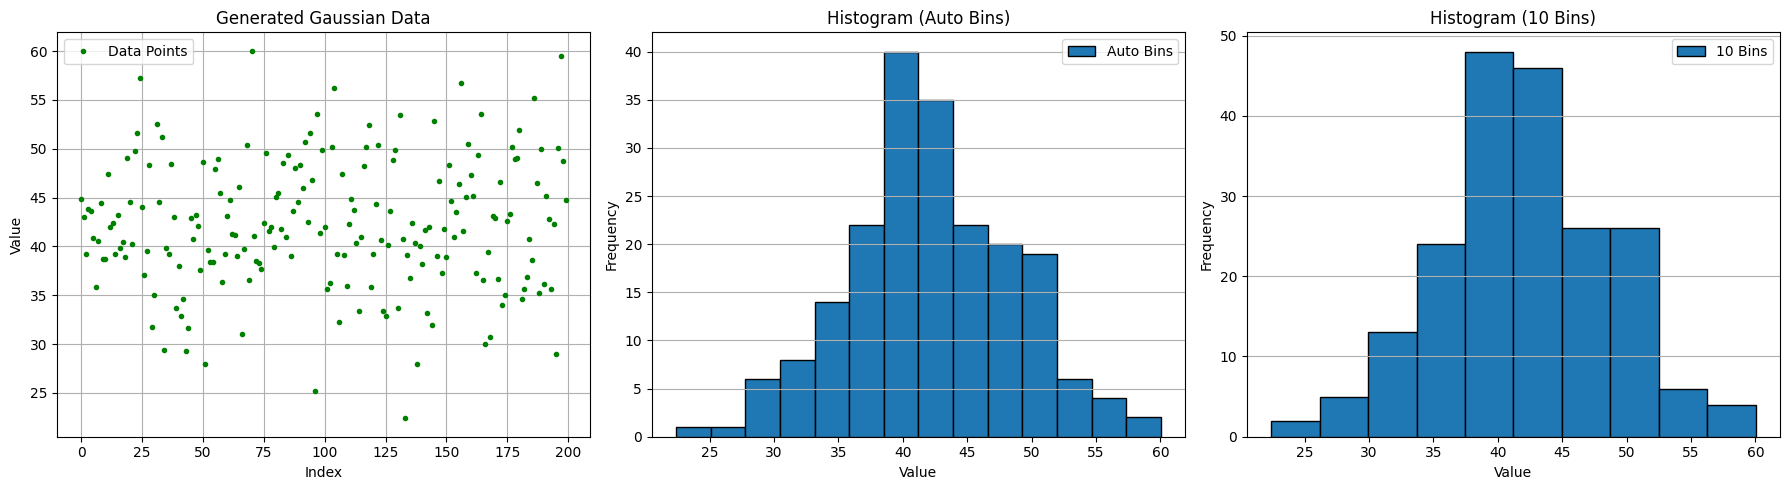

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# Plot the data points vs index
plt.subplot(1, 3, 1)
plt.plot(X_gaussian, 'g.', label='Data Points') # g: green, .: dot marker
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Generated Gaussian Data")
plt.grid(True)
plt.legend()

# Histogram with automatic binning
plt.subplot(1, 3, 2)
plt.hist(X_gaussian, bins='auto', edgecolor='black', label='Auto Bins')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram (Auto Bins)")
plt.grid(axis='y')
plt.legend()

# Histogram with a fixed number of bins (e.g., 10)
num_bins = 10
plt.subplot(1, 3, 3)
plt.hist(X_gaussian, bins=num_bins, edgecolor='black', label=f'{num_bins} Bins')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Histogram ({num_bins} Bins)")
plt.grid(axis='y')
plt.legend()

plt.tight_layout()
plt.show()

# Processing Height Data (List and NumPy)
Extract the 'Height (cm)' column, convert it to a list, demonstrate sorting using `sorted()` and `list.sort()`, then convert the column to a NumPy array using `to_numpy()`.

In [13]:
import numpy as np

if body_df is not None and 'Height (cm)' in body_df.columns:
    # Extract the column
    height_series = body_df['Height (cm)']

    # Convert to list
    height_list = list(height_series)
    print(f"Original list (first 10): {height_list[:10]}")

    # Sorting a list: sorted() returns a new sorted list
    sorted_height_list = sorted(height_list)
    print(f"Using sorted() (first 10): {sorted_height_list[:10]}")
    print(f"Original list after sorted() (first 10): {height_list[:10]}") # Unchanged

    # Sorting a list: list.sort() sorts the list in-place
    height_list_copy = height_list[:] # Make a copy before sorting in-place
    height_list_copy.sort()
    print(f"Using list.sort() (first 10): {height_list_copy[:10]}")
    # print(f"Original list after list.sort() (first 10): {height_list[:10]}") # This would show the original if we hadn't copied

    # Convert the original Series to a NumPy array
    height_numpy = height_series.to_numpy()
    print(f"\nNumPy array (first 10): {height_numpy[:10]}")
    print(f"Type of NumPy array: {type(height_numpy)}")

else:
    print("DataFrame 'body_df' or 'Height (cm)' column not available.")
    height_numpy = np.array([]) # Initialize empty array

Original list (first 10): [174.0, 175.3, 193.5, 186.5, 187.2, 181.5, 184.0, 184.5, 175.0, 184.0]
Using sorted() (first 10): [147.2, 149.5, 149.9, 151.1, 151.1, 152.0, 152.0, 152.4, 152.4, 152.4]
Original list after sorted() (first 10): [174.0, 175.3, 193.5, 186.5, 187.2, 181.5, 184.0, 184.5, 175.0, 184.0]
Using list.sort() (first 10): [147.2, 149.5, 149.9, 151.1, 151.1, 152.0, 152.0, 152.4, 152.4, 152.4]

NumPy array (first 10): [174.  175.3 193.5 186.5 187.2 181.5 184.  184.5 175.  184. ]
Type of NumPy array: <class 'numpy.ndarray'>


# Sorting and Examining Data Shapes
Check the type and shape of the NumPy array for height. Check the shape of the entire DataFrame converted to a NumPy array. Sort the height NumPy array in-place.

In [14]:
if height_numpy.size > 0: # Check if array is not empty
    print(f"Type of height_numpy: {type(height_numpy)}")
    # Shape of a 1D array is (n,)
    print(f"Shape of height_numpy: {height_numpy.shape}")

    # Convert entire DataFrame to NumPy array and check shape
    if body_df is not None:
        body_numpy = body_df.to_numpy()
        print(f"\nShape of entire DataFrame as NumPy array: {body_numpy.shape}")
    else:
        print("\nDataFrame 'body_df' not available to check shape.")

    # Sort the NumPy array in-place
    print(f"\nHeight NumPy array before sort (first 10): {height_numpy[:10]}")
    height_numpy.sort() # In-place sort for NumPy arrays
    print(f"Height NumPy array after sort (first 10): {height_numpy[:10]}")
else:
    print("Height NumPy array is empty.")

# Keep the sorted version for subsequent plots
height_sorted_numpy = height_numpy

Type of height_numpy: <class 'numpy.ndarray'>
Shape of height_numpy: (507,)

Shape of entire DataFrame as NumPy array: (507, 25)

Height NumPy array before sort (first 10): [174.  175.3 193.5 186.5 187.2 181.5 184.  184.5 175.  184. ]
Height NumPy array after sort (first 10): [147.2 149.5 149.9 151.1 151.1 152.  152.  152.4 152.4 152.4]


# Plotting Empirical CDF and Q-Q Plot (Height Data)
Create subplots to visualize the sorted height data, a rough empirical CDF, and a standard empirical CDF using `np.arange`. Plot the ECDF using `plt.ecdf`. Create a manual Q-Q plot (comparing empirical quantiles to data).

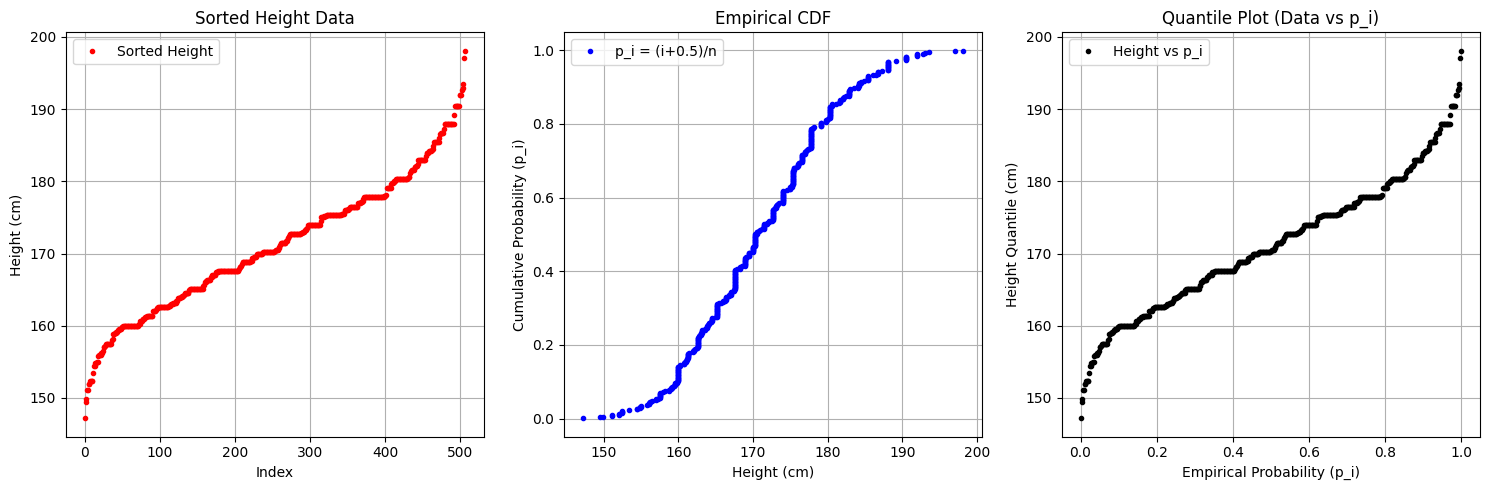

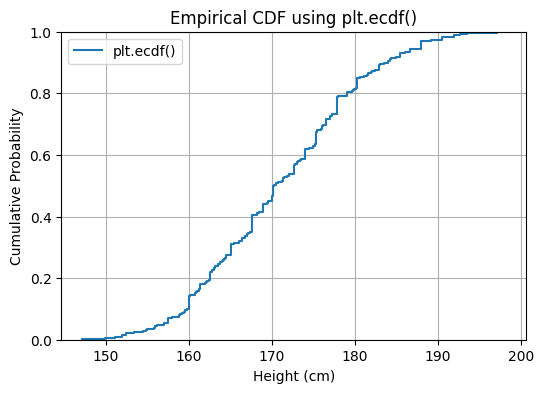

In [15]:
if height_sorted_numpy.size > 0:
    n_height = len(height_sorted_numpy)
    step = 1.0 / n_height
    # Probabilities for plotting points: (i+0.5)/n or using np.arange/np.linspace
    # Using np.arange: starts slightly above 0, ends slightly below 1
    p_i = np.arange(step / 2, 1, step)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # 1. Sorted data vs index
    ax[0].plot(height_sorted_numpy, 'r.', label='Sorted Height')
    ax[0].set_title('Sorted Height Data')
    ax[0].set_xlabel('Index')
    ax[0].set_ylabel('Height (cm)')
    ax[0].grid(True)
    ax[0].legend()

    # 2. Rough ECDF (Sorted Data vs Index/N) - Not standard
    # ax[1].plot(height_sorted_numpy, range(n_height), 'g.', label='Index') # Original notebook version
    # ax[1].set_title('Rough ECDF (Index)')
    # ax[1].set_xlabel('Height (cm)')
    # ax[1].set_ylabel('Index')

    # 2. Standard ECDF using calculated probabilities
    ax[1].plot(height_sorted_numpy, p_i, 'b.', label='p_i = (i+0.5)/n')
    ax[1].set_title('Empirical CDF')
    ax[1].set_xlabel('Height (cm)')
    ax[1].set_ylabel('Cumulative Probability (p_i)')
    ax[1].grid(True)
    ax[1].legend()

    # 3. Q-Q Plot (Data Quantiles vs Empirical Probabilities)
    # This plots the inverse of the ECDF shown in plot 2
    ax[2].plot(p_i, height_sorted_numpy, 'k.', label='Height vs p_i')
    ax[2].set_title('Quantile Plot (Data vs p_i)')
    ax[2].set_xlabel('Empirical Probability (p_i)')
    ax[2].set_ylabel('Height Quantile (cm)')
    ax[2].grid(True)
    ax[2].legend()

    plt.tight_layout()
    plt.show()

    # Using matplotlib's built-in ECDF function for comparison
    plt.figure(figsize=(6, 4))
    plt.ecdf(height_sorted_numpy, label='plt.ecdf()')
    plt.title('Empirical CDF using plt.ecdf()')
    plt.xlabel('Height (cm)')
    plt.ylabel('Cumulative Probability')
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("Sorted height data not available for ECDF/Q-Q plots.")

# Calculating and Plotting Empirical CDF (Generated Gaussian Data)
Sort the generated Gaussian data (`X_gaussian` into `Y_gaussian`). Plot the sorted data. Plot rough and standard empirical CDFs, demonstrating the use of `np.linspace` for probabilities.

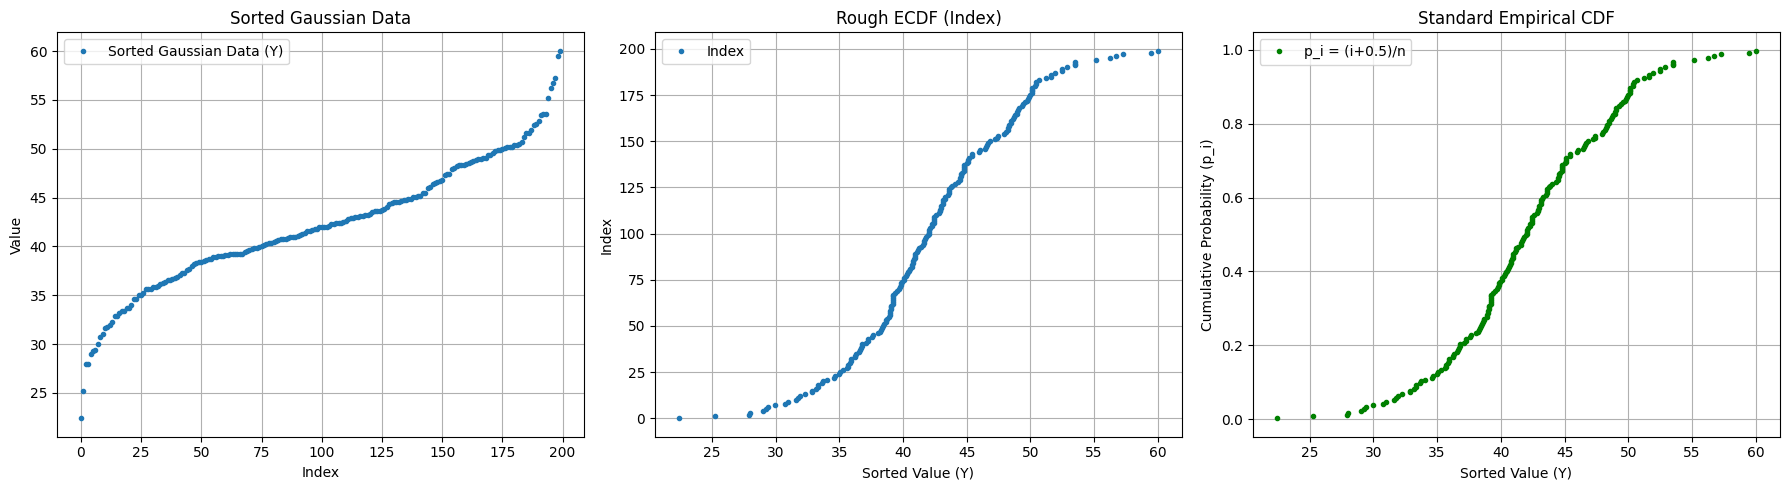

In [16]:
if 'X_gaussian' in locals() and len(X_gaussian) > 0:
    Y_gaussian = sorted(X_gaussian)
    n_gaussian = len(Y_gaussian)

    plt.figure(figsize=(18, 5))

    # 1. Sorted Gaussian data
    plt.subplot(1, 3, 1)
    plt.plot(Y_gaussian, '.', label='Sorted Gaussian Data (Y)')
    plt.title('Sorted Gaussian Data')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()

    # 2. Rough ECDF (vs index)
    plt.subplot(1, 3, 2)
    plt.plot(Y_gaussian, range(n_gaussian), '.', label='Index')
    plt.title('Rough ECDF (Index)')
    plt.xlabel('Sorted Value (Y)')
    plt.ylabel('Index')
    plt.grid(True)
    plt.legend()

    # 3. Standard ECDF using np.linspace
    # Generates n points evenly spaced between start and end (inclusive)
    # p_i_linspace = np.linspace(0.5/n_gaussian, 1 - 0.5/n_gaussian, n_gaussian)
    # Equivalent to np.arange used previously for height data
    p_i_gaussian = np.arange(0.5/n_gaussian, 1, 1.0/n_gaussian)

    plt.subplot(1, 3, 3)
    plt.plot(Y_gaussian, p_i_gaussian, 'g.', label='p_i = (i+0.5)/n')
    plt.title('Standard Empirical CDF')
    plt.xlabel('Sorted Value (Y)')
    plt.ylabel('Cumulative Probability (p_i)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Generated Gaussian data 'X_gaussian' not available.")

# Calculating Q-Q Plot with Linear Fit (Generated Gaussian Data)
Calculate theoretical quantiles using `scipy.stats.norm.ppf`. Create a Q-Q plot comparing theoretical quantiles (from a standard normal distribution) to sorted sample values (`Y_gaussian`). Perform linear regression using `scipy.stats.linregress` and plot the fitted line on the Q-Q plot. The slope estimates the standard deviation, and the intercept estimates the mean of the sample data.

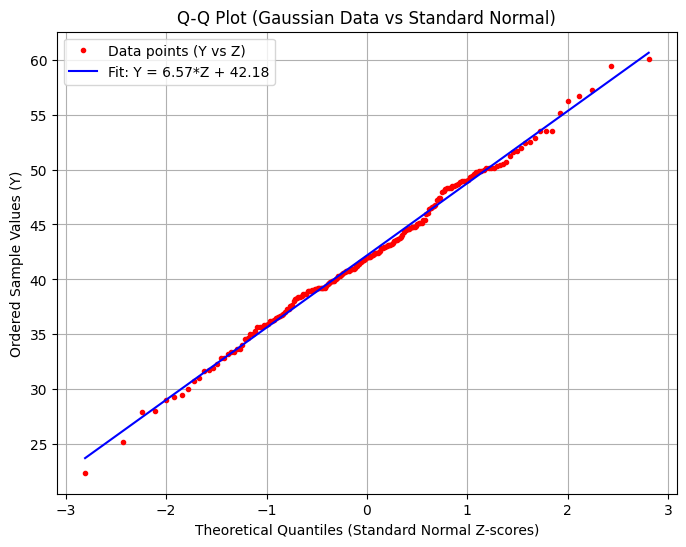

Equation of the fitted line: Y = 6.5739 * Z + 42.1837
Estimated Mean (intercept): 42.1837 (Actual: 42)
Estimated Std Dev (slope): 6.5739 (Actual: 7)
R-squared: 0.9958


In [17]:
from scipy.stats import norm, linregress

if 'Y_gaussian' in locals() and len(Y_gaussian) > 0:
    n_gaussian = len(Y_gaussian)
    # Calculate empirical probabilities p_i
    p_i_gaussian = np.arange(0.5/n_gaussian, 1, 1.0/n_gaussian)

    # Calculate theoretical quantiles (Z-scores) for these probabilities
    # norm.ppf is the Percent Point Function (inverse of CDF) for standard normal
    z_i_theoretical = norm.ppf(p_i_gaussian)

    # Perform linear regression: Y = slope * Z + intercept
    slope, intercept, r_value, p_value, std_err = linregress(z_i_theoretical, Y_gaussian)

    # Create the fitted line data
    fitted_Y = intercept + slope * z_i_theoretical

    # Create the Q-Q plot
    plt.figure(figsize=(8, 6))
    plt.plot(z_i_theoretical, Y_gaussian, 'r.', label='Data points (Y vs Z)')
    plt.plot(z_i_theoretical, fitted_Y, 'b-', label=f'Fit: Y = {slope:.2f}*Z + {intercept:.2f}')

    # Add title and labels
    plt.title('Q-Q Plot (Gaussian Data vs Standard Normal)')
    plt.xlabel('Theoretical Quantiles (Standard Normal Z-scores)')
    plt.ylabel('Ordered Sample Values (Y)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the results
    print(f"Equation of the fitted line: Y = {slope:.4f} * Z + {intercept:.4f}")
    print(f"Estimated Mean (intercept): {intercept:.4f} (Actual: {mu})")
    print(f"Estimated Std Dev (slope): {slope:.4f} (Actual: {sigma})")
    print(f"R-squared: {r_value**2:.4f}")
else:
    print("Sorted Gaussian data 'Y_gaussian' not available for Q-Q plot.")


# Plotting Theoretical Normal CDF
Import `scipy.stats.norm`. Define a range of values and calculate the corresponding CDF values for a standard normal distribution (mean=0, std=1) using `norm.cdf()`. Plot the theoretical CDF.

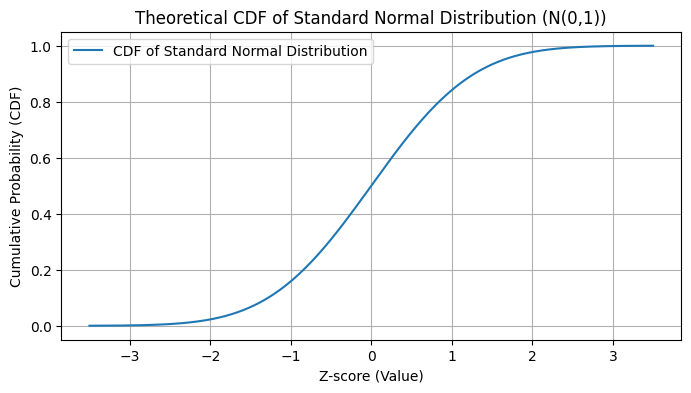

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range of Z-values for the plot
x_values = np.linspace(-3.5, 3.5, 1000) # From -3.5 to +3.5 standard deviations

# Calculate the CDF values for these points using standard normal (mean=0, std=1)
cdf_values = norm.cdf(x_values, loc=0, scale=1)

# Plotting the CDF
plt.figure(figsize=(8, 4))
plt.plot(x_values, cdf_values, label='CDF of Standard Normal Distribution')
plt.title('Theoretical CDF of Standard Normal Distribution (N(0,1))')
plt.xlabel('Z-score (Value)')
plt.ylabel('Cumulative Probability (CDF)')
plt.grid(True)
plt.legend()
plt.show()

# Generating Normal Data with SciPy Stats
Generate random variables from a specified normal distribution (e.g., mean=100, std=15) using `scipy.stats.norm.rvs()` directly and by creating a `norm` object first. Plot histograms of the generated data.

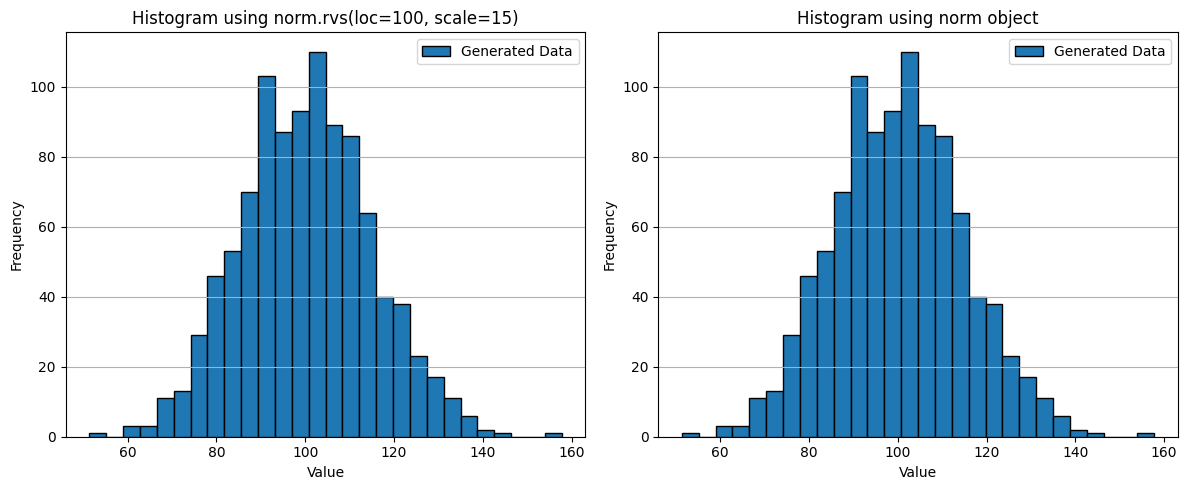

Method 1 - Mean: 100.29, Std Dev: 14.68
Method 2 - Mean: 100.29, Std Dev: 14.68


In [19]:
import matplotlib.pyplot as plt
from scipy.stats import norm

target_mean = 100
target_std = 15
sample_size = 1000

plt.figure(figsize=(12, 5))

# Method 1: Generate directly using norm.rvs()
data_direct = norm.rvs(loc=target_mean, scale=target_std, size=sample_size, random_state=42)
plt.subplot(1, 2, 1)
plt.hist(data_direct, bins='auto', edgecolor='black', label='Generated Data')
plt.title(f'Histogram using norm.rvs(loc={target_mean}, scale={target_std})')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.legend()

# Method 2: Create a norm object first
my_norm_dist = norm(loc=target_mean, scale=target_std)
data_object = my_norm_dist.rvs(size=sample_size, random_state=42) # Use same random state for comparison
plt.subplot(1, 2, 2)
plt.hist(data_object, bins='auto', edgecolor='black', label='Generated Data')
plt.title(f'Histogram using norm object')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.legend()

plt.tight_layout()
plt.show()

# Verify means and std deviations (should be close to target)
print(f"Method 1 - Mean: {np.mean(data_direct):.2f}, Std Dev: {np.std(data_direct):.2f}")
print(f"Method 2 - Mean: {np.mean(data_object):.2f}, Std Dev: {np.std(data_object):.2f}")

# Loading Data and Creating Scatter Plot (Weight vs Height)
Reload the data from the Excel file into a pandas DataFrame (if not already loaded or to ensure it's fresh) and create a scatter plot comparing 'Weight (kg)' and 'Height (cm)' using `plt.plot()`.

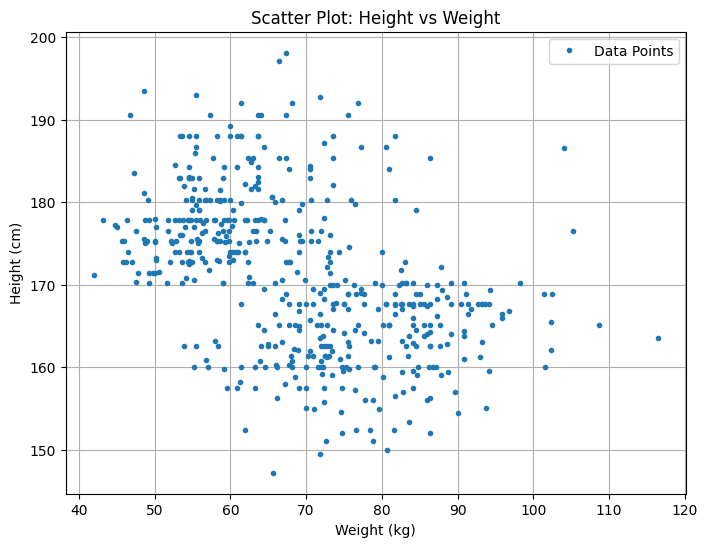

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path again or ensure it's correct
path = 'body.xlsx'

try:
    # Reload or use existing DataFrame
    if 'body_df' not in locals() or body_df is None:
         body_df = pd.read_excel(path, index_col=0)
         print("Reloaded body.xlsx")

    # Check if required columns exist
    if 'Weight (kg)' in body_df.columns and 'Height (cm)' in body_df.columns:
        # Create scatter plot
        plt.figure(figsize=(8, 6))
        plt.plot(body_df['Weight (kg)'], body_df['Height (cm)'], '.', label='Data Points')
        plt.xlabel('Weight (kg)')
        plt.ylabel('Height (cm)')
        plt.title('Scatter Plot: Height vs Weight')
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        print("Required columns ('Weight (kg)' or 'Height (cm)') not found in DataFrame.")

except FileNotFoundError:
    print(f"Error: File not found at {path}")
except Exception as e:
    print(f"An error occurred: {e}")